## Project Name: Cab Analysis: Using Regression Techniques

The main aim of this project is to analyse the best cab services company. You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment


## All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [373]:
## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [374]:
dataset_cab=pd.read_csv('C:\Ankit Docs\Internship - data glacier\DataSets-main\DataSets-main\Cab_Data.csv')

## print shape of dataset with rows and columns
print(dataset_cab.shape)
dataset_cab.head()

(359393, 8)


C:\Users\Ankit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date_format
0,10000011.0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,01-08-2016 00:00:00
1,10000012.0,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,01-06-2016 00:00:00
2,10000013.0,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,01-02-2016 00:00:00
3,10000014.0,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,01-07-2016 00:00:00
4,10000015.0,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,01-03-2016 00:00:00


In [376]:
dataset_cust=pd.read_csv('C:\Ankit Docs\Internship - data glacier\DataSets-main\DataSets-main\Customer_ID.csv')
print(dataset_cust.shape)
dataset_cust.head()

(49171, 4)


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [377]:
dataset_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date_format
0,10000011.0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,01-08-2016 00:00:00
1,10000012.0,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,01-06-2016 00:00:00
2,10000013.0,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,01-02-2016 00:00:00
3,10000014.0,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,01-07-2016 00:00:00
4,10000015.0,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,01-03-2016 00:00:00


In [378]:
dataset_txn=pd.read_csv('C:\Ankit Docs\Internship - data glacier\DataSets-main\DataSets-main\Transaction_ID.csv')
print(dataset_txn.shape)
dataset_txn.head()

(440098, 3)


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [379]:
dataset_txn_cab = pd.merge(dataset_cab , dataset_txn)
dataset_txn_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date_format,Customer ID,Payment_Mode
0,10000011.0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,01-08-2016 00:00:00,29290,Card
1,10000012.0,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,01-06-2016 00:00:00,27703,Card
2,10000013.0,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,01-02-2016 00:00:00,28712,Cash
3,10000014.0,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,01-07-2016 00:00:00,28020,Cash
4,10000015.0,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,01-03-2016 00:00:00,27182,Card


In [380]:
dataset_final = pd.merge(dataset_txn_cab , dataset_cust)
dataset_final.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date_format,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011.0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,01-08-2016 00:00:00,29290,Card,Male,28,10813
1,10351127.0,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,07-21-2018 00:00:00,29290,Cash,Male,28,10813
2,10412921.0,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11-23-2018 00:00:00,29290,Card,Male,28,10813
3,10000012.0,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,01-06-2016 00:00:00,27703,Card,Male,27,9237
4,10320494.0,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,04-21-2018 00:00:00,27703,Card,Male,27,9237


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


## Missing Values

In [381]:
dataset_final.head().isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
date_format           0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [382]:
dataset_final.duplicated().sum()

0

In [383]:
dataset_final.info()
dataset_final["date_format"] = pd.to_datetime(dataset_final["date_format"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  float64
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   date_format         359392 non-null  object 
 8   Customer ID         359392 non-null  int64  
 9   Payment_Mode        359392 non-null  object 
 10  Gender              359392 non-null  object 
 11  Age                 359392 non-null  int64  
 12  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 38.4+ MB


In [384]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  float64       
 1   Date of Travel      359392 non-null  object        
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   date_format         359392 non-null  datetime64[ns]
 8   Customer ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
dtypes: datetime64[ns](1), float64

### Numerical Variables

In [385]:
dataset_final['month']=dataset_final['date_format'].dt.month
# year
dataset_final['year']=dataset_final['date_format'].dt.year
dataset_final['dayofweek_num']=dataset_final['date_format'].dt.dayofweek  
dataset_final.head()
#dataset_final['dayofweek_num'] = dataset_final['dayofweek_num'].astype(str)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date_format,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),month,year,dayofweek_num
0,10000011.0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813,1,2016,4
1,10351127.0,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813,7,2018,5
2,10412921.0,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813,11,2018,4
3,10000012.0,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237,1,2016,2
4,10320494.0,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237,4,2018,5


In [386]:
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  float64       
 1   Date of Travel      359392 non-null  object        
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   date_format         359392 non-null  datetime64[ns]
 8   Customer ID         359392 non-null  int64         
 9   Payment_Mode        359392 non-null  object        
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  month               359392 no

In [417]:
dataset_final = dataset_final.drop(['Date of Travel','Transaction ID', 'Payment_Mode'], axis=1)

In [418]:
dataset_final.describe(include='all').T

<ipython-input-418-05ae724f5cc9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset_final.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Company,359392,2,Yellow Cab,274681,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,359392,19,NEW YORK NY,99885,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KM Travelled,359392.0,NaN,NaN,NaN,NaT,NaT,22.567254,12.233526,1.9,12.0,22.44,32.96,48.0
Price Charged,359392.0,NaN,NaN,NaN,NaT,NaT,423.443311,274.378911,15.6,206.4375,386.36,583.66,2048.03
Cost of Trip,359392.0,NaN,NaN,NaN,NaT,NaT,286.190113,157.993661,19.0,151.2,282.48,413.6832,691.2
date_format,359392,1095,2018-01-05 00:00:00,2022,2016-01-02,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,359392.0,NaN,NaN,NaN,NaT,NaT,19191.652115,21012.412463,1.0,2705.0,7459.0,36078.0,60000.0
Gender,359392,2,Male,205912,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,359392.0,NaN,NaN,NaN,NaT,NaT,35.336705,12.594234,18.0,25.0,33.0,42.0,65.0
Income (USD/Month),359392.0,NaN,NaN,NaN,NaT,NaT,15048.822937,7969.409482,2000.0,8424.0,14685.0,21035.0,35000.0


In [419]:
for feature in dataset_final.columns:
    if dataset_final[feature].dtype == 'int64':
        print(pd.DataFrame(dataset_final[feature].value_counts()))
        print("\n")

       Customer ID
494             54
2939            53
2766            51
1070            51
126             50
...            ...
35773            1
27809            1
17572            1
23719            1
49043            1

[46148 rows x 1 columns]


      Age
23  12327
20  12229
27  12030
25  11973
32  11959
34  11825
39  11798
22  11796
26  11655
19  11591
40  11536
33  11457
21  11431
30  11165
28  11163
24  11151
37  11086
36  11054
31  10930
38  10906
18  10846
29  10675
35  10555
61   4361
45   4248
49   4158
58   4107
50   4089
47   4087
59   4068
42   3970
51   3931
46   3918
64   3908
41   3852
43   3823
54   3810
52   3784
60   3775
56   3742
63   3733
44   3725
48   3700
53   3641
62   3530
57   3473
55   3442
65   3379


       Income (USD/Month)
20884                 134
8899                  133
22525                 129
16512                 121
16137                 118
...                   ...
4248                    1
7834                    1
34185             

#Most of the cabs are booked on Weekends. When we talk about seasonal bookings, most of them are from the 3rd quarter. Max number of cabs were booked on 2018-01-05. Max number of cabs were booked from New York.

Text(0.5, 1.0, 'dayofweek_num vs Customers')

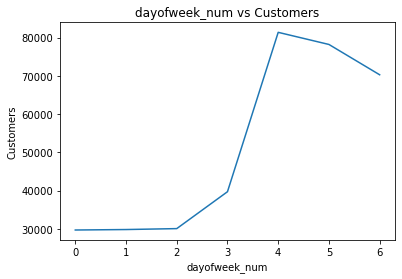

In [420]:
df2 = dataset_final.groupby(['dayofweek_num'])['Customer ID'].count().plot()
plt.xlabel('dayofweek_num')
plt.ylabel('Customers')
plt.title("dayofweek_num vs Customers")

In [421]:
#Graphical representation of days wrt number of bookings.

<AxesSubplot:xlabel='Age'>

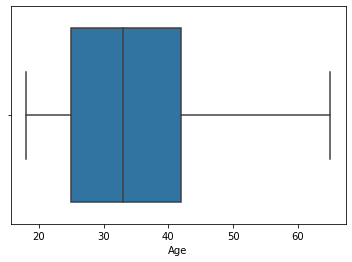

In [422]:
import seaborn as sns     # library for advance visualization
sns.boxplot(x=dataset_final['Age'])

In [423]:
#Maximum age group consists between 23 to 42. No outliers found.

<AxesSubplot:xlabel='Income (USD/Month)'>

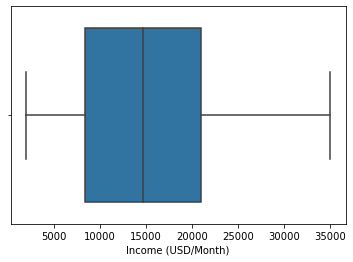

In [424]:
sns.boxplot(x=dataset_final['Income (USD/Month)'])

<AxesSubplot:xlabel='Cost of Trip'>

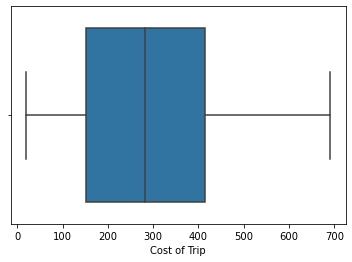

In [425]:
sns.boxplot(x=dataset_final['Cost of Trip'])

<AxesSubplot:>

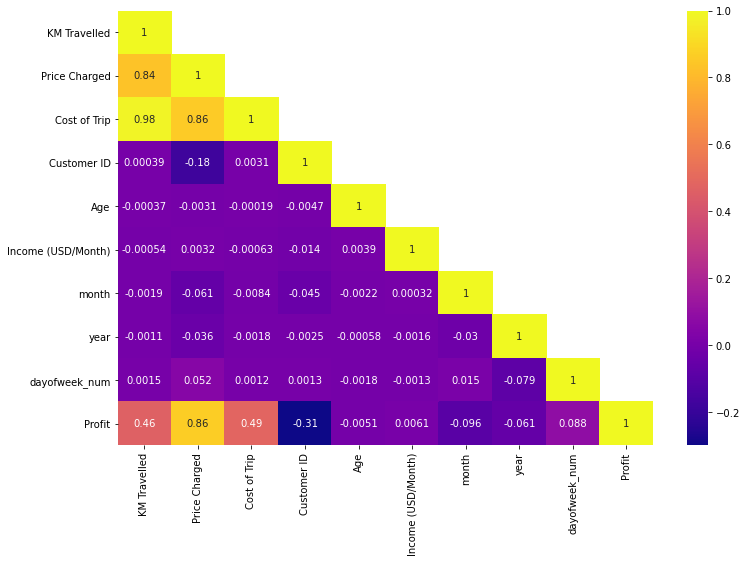

In [426]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset_final.corr(),annot=True,mask=np.triu(dataset_final.corr(),+1),cmap='plasma',vmin=-0.3,vmax=1)

Text(0.5, 1.0, 'dayofweek_num vs Count')

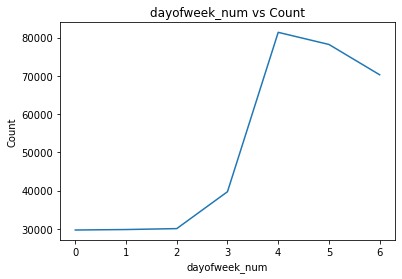

In [427]:
df2 = dataset_final.groupby(['dayofweek_num'])['dayofweek_num'].count().plot()
plt.xlabel('dayofweek_num')
plt.ylabel('Count')
plt.title("dayofweek_num vs Count")

Text(0.5, 1.0, 'month vs Count')

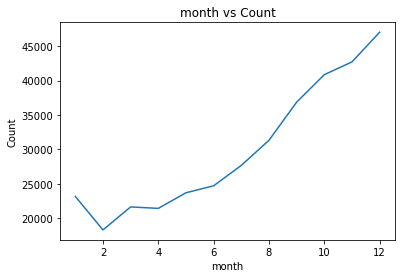

In [428]:
df2 = dataset_final.groupby(['month'])['month'].count().plot()
plt.xlabel('month')
plt.ylabel('Count')
plt.title("month vs Count")

Text(0.5, 1.0, 'Cost of Trip across three years')

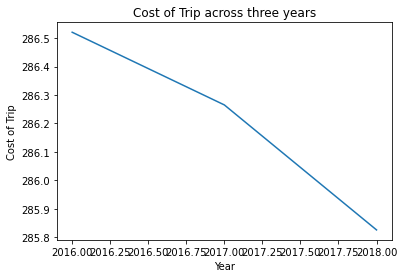

In [429]:
df2 = dataset_final.groupby(['year'])['Cost of Trip'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Cost of Trip')
plt.title("Cost of Trip across three years")

Text(0.5, 1.0, 'Price Charged across three years')

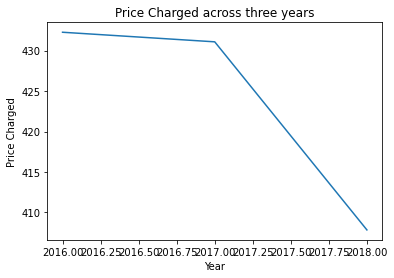

In [430]:
df2 = dataset_final.groupby(['year'])['Price Charged'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Price Charged')
plt.title("Price Charged across three years")

Text(0.5, 1.0, 'Income (USD/Month) across three years')

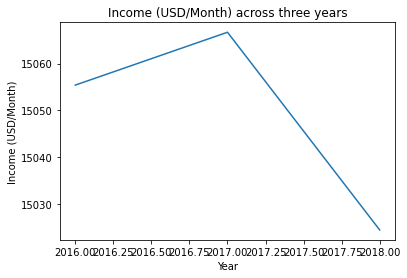

In [431]:
df2 = dataset_final.groupby(['year'])['Income (USD/Month)'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Income (USD/Month)')
plt.title("Income (USD/Month) across three years")

In [432]:
dataset_final['Profit'] = dataset_final['Price Charged'] - dataset_final['Cost of Trip']

Text(0.5, 1.0, 'Profit across three years')

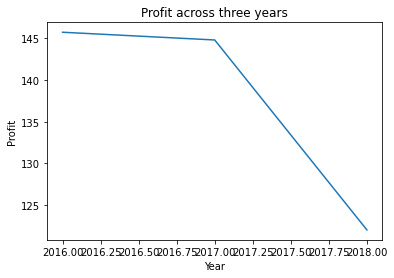

In [433]:
df2 = dataset_final.groupby(['year'])['Profit'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title("Profit across three years")

Text(0.5, 1.0, 'Company vs Count')

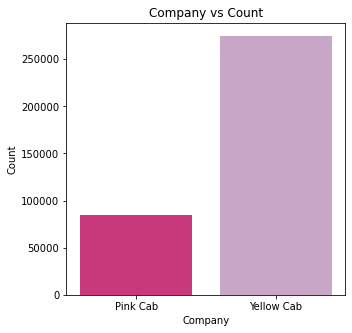

In [434]:
plt.figure(figsize=(5,5))
sns.countplot(x=(dataset_final.Company),palette='PuRd_r')
plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Company vs Count")

In [435]:
dataset_final['Profit'] = dataset_finalCopy['Price Charged'] - dataset_finalCopy['Cost of Trip']

<AxesSubplot:>

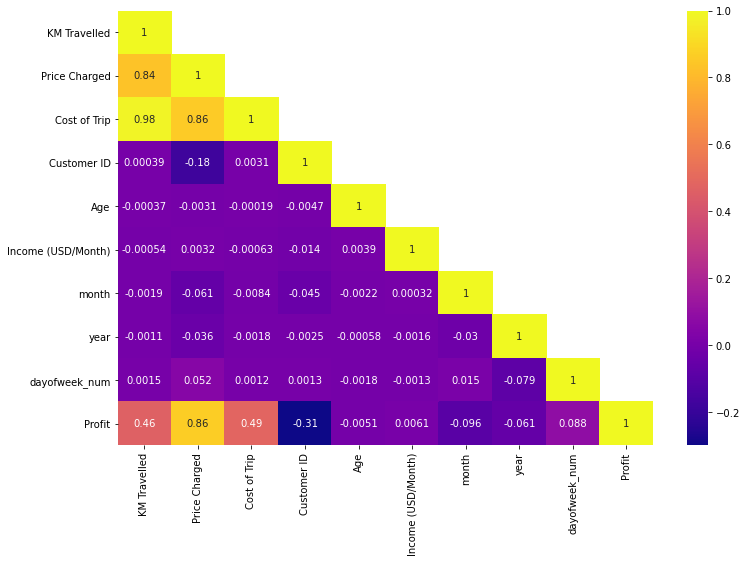

In [436]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset_final.corr(),annot=True,mask=np.triu(dataset_final.corr(),+1),cmap='plasma',vmin=-0.3,vmax=1)

In [437]:
dataset_finalCopy.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,date_format,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),month,year,dayofweek_num,Profit
0,10000011.0,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Card,Male,28,10813,1,2016,4,57.3150
1,10351127.0,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Cash,Male,28,10813,7,2018,5,281.2772
2,10412921.0,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Card,Male,28,10813,11,2018,4,194.6480
3,10000012.0,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Card,Male,27,9237,1,2016,2,23.6660
4,10320494.0,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Card,Male,27,9237,4,2018,5,253.9808


In [438]:
t = dataset_final.groupby(['Company'])['Profit'].mean()

In [439]:
t

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Profit'>

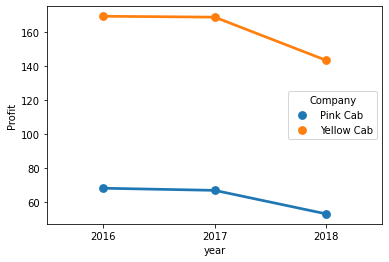

In [440]:
sns.pointplot(x='year',y='Profit',hue='Company',data=dataset_final,ci=None)

<AxesSubplot:xlabel='month', ylabel='Profit'>

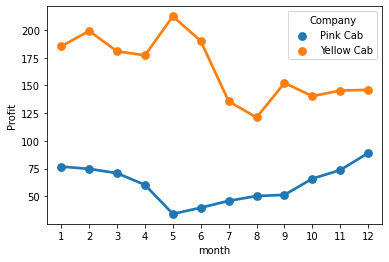

In [441]:
sns.pointplot(x='month',y='Profit',hue='Company',data=dataset_final,ci=None)

In [442]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
formula = 'Profit ~ C(month)'
model = smf.ols(formula ,data = dataset_final).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                sum_sq        df           F  PR(>F)
C(month)  1.718256e+08      11.0  619.307189     0.0
Residual  9.064482e+09  359380.0         NaN     NaN


In [443]:
dataset_final

,Company,City,KM Travelled,Price Charged,Cost of Trip,date_format,Customer ID,Gender,Age,Income (USD/Month),month,year,dayofweek_num,Profit
0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,29290,Male,28,10813,1,2016,4,57.3150
1,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,2018-07-21,29290,Male,28,10813,7,2018,5,281.2772
2,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,2018-11-23,29290,Male,28,10813,11,2018,4,194.6480
3,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,27703,Male,27,9237,1,2016,2,23.6660
4,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,2018-04-21,27703,Male,27,9237,4,2018,5,253.9808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,2018-01-07,38520,Female,42,19417,1,2018,6,47.2656
359388,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,2018-01-03,12490,Male,33,18713,1,2018,2,105.0980
359389,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,2018-01-04,41414,Male,38,3960,1,2018,3,71.2100
359390,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,2018-01-06,41677,Male,23,19454,1,2018,5,21.8600
